In [35]:
import pandas as pd
import glob
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bf_files = glob.glob("Before/*.csv")
bf_li = []

for filename in bf_files:
    df = pd.read_csv(filename, index_col = None, header = 0)
    bf_li.append(df)

bf_data = pd.concat(bf_li, axis = 0, ignore_index = True)

In [4]:
bf_data.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,679,2018-05-01 00:00:00,2018-05-01 00:11:19,31302,Wisconsin Ave & Newark St NW,31307,3000 Connecticut Ave NW / National Zoo,W22771,Member
1,578,2018-05-01 00:00:20,2018-05-01 00:09:59,31232,7th & F St NW / National Portrait Gallery,31609,Maine Ave & 7th St SW,W21320,Casual
2,580,2018-05-01 00:00:28,2018-05-01 00:10:09,31232,7th & F St NW / National Portrait Gallery,31609,Maine Ave & 7th St SW,W20863,Casual
3,606,2018-05-01 00:01:22,2018-05-01 00:11:29,31104,Adams Mill & Columbia Rd NW,31509,New Jersey Ave & R St NW,W00822,Member
4,582,2018-05-01 00:04:52,2018-05-01 00:14:34,31129,15th St & Pennsylvania Ave NW/Pershing Park,31118,3rd & Elm St NW,W21846,Member


In [7]:
bf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11236278 entries, 0 to 11236277
Data columns (total 9 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Duration              int64 
 1   Start date            object
 2   End date              object
 3   Start station number  int64 
 4   Start station         object
 5   End station number    int64 
 6   End station           object
 7   Bike number           object
 8   Member type           object
dtypes: int64(3), object(6)
memory usage: 771.5+ MB


In [ ]:
# geolocator = Nominatim(user_agent = "smyGeocoder")
# geocode = RateLimiter(geolocator.geocode, min_delay_seconds = 1)

In [ ]:
# bf_data['start_loc'] = bf_data['Start station'].apply(geocode)
# bf_data['start_point'] = bf_data['start_loc'].apply(lambda loc: tuple(loc.point) if loc else None)
# bf_data[['start_lat', 'start_lng', 'start_alt']] = pd.DataFrame(bf_data['start_point'], index = df.index)

In [ ]:
# bf_data['end_loc'] = bf_data['End station'].apply(geocode)
# bf_data['end_point'] = bf_data['end_loc'].apply(lambda loc: tuple(loc.point) if loc else None)
# bf_data[['end_lat', 'end_lng', 'end_alt']] = pd.DataFrame(bf_data['end_point'], index = df.index)

In [23]:
bf_data_nm = bf_data.rename(columns = {"Start date": "started_at", 
                                       "End date": "ended_at", 
                                       "Start station number": "start_station_id",
                                       "Start station": "start_station_name", 
                                       "End station number": "end_station_id",
                                       "End station": "end_station_name",
                                       "Member type": "member_casual"})

In [5]:
af_files = glob.glob("After/*.csv")
af_li = []

for filename in af_files:
    df = pd.read_csv(filename, index_col = None, header = 0)
    af_li.append(df)

af_data = pd.concat(af_li, axis = 0, ignore_index = True)

/usr/local/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
af_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C04E20007D039277,docked_bike,2020-12-02 09:10:36,2020-12-02 09:24:12,18th St & Wyoming Ave NW,31114.0,18th St & Pennsylvania Ave NW,31242.0,38.918809,-77.041571,38.899680,-77.041539,casual
1,A488C0D9F4761D06,classic_bike,2020-12-31 12:46:29,2020-12-31 14:01:07,Potomac & Pennsylvania Ave SE,31606.0,17th St & Independence Ave SW,31290.0,38.880300,-76.986200,38.888097,-77.038325,casual
2,9E7E97A927A85552,classic_bike,2020-12-31 12:47:03,2020-12-31 14:01:04,Potomac & Pennsylvania Ave SE,31606.0,17th St & Independence Ave SW,31290.0,38.880300,-76.986200,38.888097,-77.038325,casual
3,565C5C331ABAD77B,classic_bike,2020-12-29 13:50:51,2020-12-29 14:12:22,Wakefield High School,31054.0,S Glebe Rd & Potomac Ave,31010.0,38.847129,-77.112550,38.842600,-77.050200,member
4,7576B3F4B4D6ADFF,classic_bike,2020-12-27 12:30:28,2020-12-27 12:36:12,Washington-Liberty High School / N Stafford St...,31920.0,Virginia Square Metro / Monroe St & 9th St N,31024.0,38.888282,-77.111066,38.882788,-77.103148,member


In [8]:
af_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2169546 entries, 0 to 2169545
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 215.2+ MB


In [25]:
bf_filter = bf_data_nm[["started_at", "ended_at", "start_station_id", "start_station_name", 
                        "end_station_id", "end_station_name", "member_casual"]]
af_filter = af_data[["started_at", "ended_at", "start_station_id", "start_station_name", 
                     "end_station_id", "end_station_name", "member_casual"]]
data = pd.concat([bf_filter, af_filter], axis = 0, ignore_index = True)

In [26]:
data.head()

,started_at,ended_at,start_station_id,start_station_name,end_station_id,end_station_name,member_casual
0,2018-05-01 00:00:00,2018-05-01 00:11:19,31302,Wisconsin Ave & Newark St NW,31307,3000 Connecticut Ave NW / National Zoo,Member
1,2018-05-01 00:00:20,2018-05-01 00:09:59,31232,7th & F St NW / National Portrait Gallery,31609,Maine Ave & 7th St SW,Casual
2,2018-05-01 00:00:28,2018-05-01 00:10:09,31232,7th & F St NW / National Portrait Gallery,31609,Maine Ave & 7th St SW,Casual
3,2018-05-01 00:01:22,2018-05-01 00:11:29,31104,Adams Mill & Columbia Rd NW,31509,New Jersey Ave & R St NW,Member
4,2018-05-01 00:04:52,2018-05-01 00:14:34,31129,15th St & Pennsylvania Ave NW/Pershing Park,31118,3rd & Elm St NW,Member


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13405824 entries, 0 to 13405823
Data columns (total 7 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   started_at          object
 1   ended_at            object
 2   start_station_id    object
 3   start_station_name  object
 4   end_station_id      object
 5   end_station_name    object
 6   member_casual       object
dtypes: object(7)
memory usage: 715.9+ MB


In [28]:
data.isnull().sum()

started_at                 0
ended_at                   0
start_station_id      138604
start_station_name    138604
end_station_id        157000
end_station_name      157000
member_casual              0
dtype: int64

In [29]:
data['started_at'] = pd.to_datetime(data['started_at'])
data['ended_at'] = pd.to_datetime(data['ended_at'])

In [30]:
data['duration'] = data['ended_at'] - data['started_at']
data['duration'] = data['duration'].dt.total_seconds()

In [31]:
data['month'] = data['started_at'].dt.month
data['year'] = data['started_at'].dt.year

In [50]:
x = data.loc[(data['year'] == 2020) & (data['month'] == 12)]
x

,started_at,ended_at,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,duration,month,year
11236278,2020-12-02 09:10:36,2020-12-02 09:24:12,31114.0,18th St & Wyoming Ave NW,31242.0,18th St & Pennsylvania Ave NW,casual,816.0,12,2020
11236279,2020-12-31 12:46:29,2020-12-31 14:01:07,31606.0,Potomac & Pennsylvania Ave SE,31290.0,17th St & Independence Ave SW,casual,4478.0,12,2020
11236280,2020-12-31 12:47:03,2020-12-31 14:01:04,31606.0,Potomac & Pennsylvania Ave SE,31290.0,17th St & Independence Ave SW,casual,4441.0,12,2020
11236281,2020-12-29 13:50:51,2020-12-29 14:12:22,31054.0,Wakefield High School,31010.0,S Glebe Rd & Potomac Ave,member,1291.0,12,2020
11236282,2020-12-27 12:30:28,2020-12-27 12:36:12,31920.0,Washington-Liberty High School / N Stafford St...,31024.0,Virginia Square Metro / Monroe St & 9th St N,member,344.0,12,2020
...,...,...,...,...,...,...,...,...,...,...
11342102,2020-12-12 13:49:55,2020-12-12 14:17:02,31247.0,Jefferson Dr & 14th St SW,31235.0,19th St & Constitution Ave NW,casual,1627.0,12,2020
11342103,2020-12-03 13:43:26,2020-12-03 14:06:11,31247.0,Jefferson Dr & 14th St SW,31288.0,4th St & Madison Dr NW,casual,1365.0,12,2020
11342104,2020-12-06 07:27:47,2020-12-06 08:03:46,31247.0,Jefferson Dr & 14th St SW,31235.0,19th St & Constitution Ave NW,casual,2159.0,12,2020
11342105,2020-12-21 13:46:01,2020-12-21 14:26:59,31247.0,Jefferson Dr & 14th St SW,31277.0,17th & G St NW,casual,2458.0,12,2020


In [51]:
x[x['duration']<0]

,started_at,ended_at,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,duration,month,year
11236309,2020-12-05 10:45:31,2020-12-05 10:45:27,31064.0,Gravelly Point,31618.0,4th & East Capitol St NE,member,-4.0,12,2020
11236435,2020-12-15 12:50:52,2020-11-25 15:28:23,31124.0,14th & Irving St NW,31500.0,4th & W St NE,member,-1718549.0,12,2020
11236897,2020-12-15 12:56:37,2020-11-25 16:27:25,31618.0,4th & East Capitol St NE,31623.0,Columbus Circle / Union Station,member,-1715352.0,12,2020
11236932,2020-12-15 12:47:26,2020-11-25 14:27:15,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,casual,-1722011.0,12,2020
11237183,2020-12-15 12:43:18,2020-11-25 13:03:02,31628.0,1st & K St SE,31608.0,8th & Eye St SE / Barracks Row,member,-1726816.0,12,2020
...,...,...,...,...,...,...,...,...,...,...
11341093,2020-12-15 12:50:18,2020-11-25 14:36:19,31308.0,39th & Veazey St NW,31310.0,Connecticut & Nebraska Ave NW,casual,-1721639.0,12,2020
11341307,2020-12-15 13:08:50,2020-11-25 20:35:23,31283.0,14th & L St NW,31237.0,25th St & Pennsylvania Ave NW,casual,-1701207.0,12,2020
11341309,2020-12-15 13:21:38,2020-11-25 14:33:51,31638.0,1st & H St NW,31283.0,14th & L St NW,member,-1723667.0,12,2020
11341610,2020-12-15 12:40:12,2020-11-25 12:17:12,31415.0,Georgia Ave & Kennedy St NW,31602.0,Park Rd & Holmead Pl NW,casual,-1729380.0,12,2020


In [52]:
average_duration_month = pd.DataFrame(data[data['duration'] >= 0].groupby(['year', 'month'])['duration'].mean())
average_duration_month.reset_index(inplace = True)

In [53]:
average_duration_month

,year,month,duration
0,2017,1,889.677696
1,2017,2,1046.920898
2,2017,3,1064.355937
3,2017,4,1377.502230
4,2017,5,1198.059872
5,2017,6,1238.317572
6,2017,7,1351.582928
7,2017,8,1187.925574
8,2017,9,1154.613474
9,2017,10,1102.392495


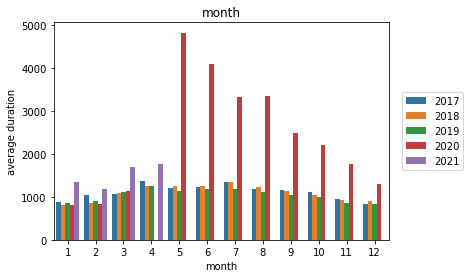

In [54]:
sns.barplot(x = 'month', y='duration', data = average_duration_month, hue='year')
plt.legend(bbox_to_anchor = (1.04, 0.5), loc = "center left", borderaxespad = 0)
plt.title('month')
plt.ylabel('average duration')
plt.show()